<ipython-input-47-fcd479b1f19b>:45: RuntimeWarning: invalid value encountered in double_scalars
  b[j][k] = b[j][k]/(2*area)


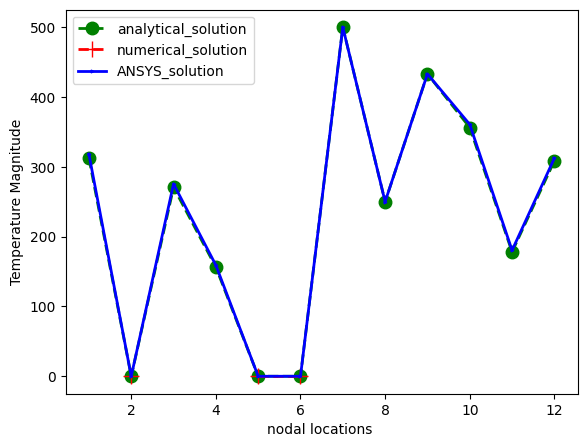

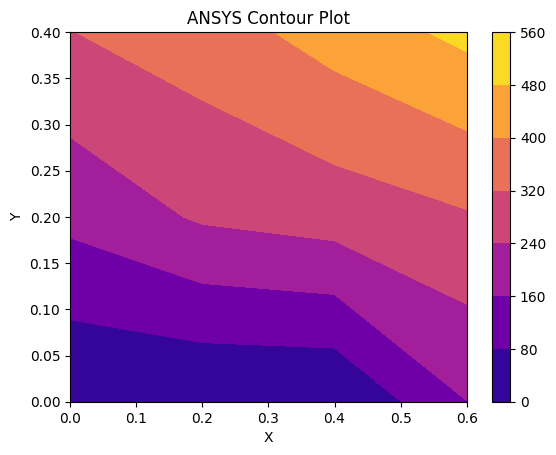

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
elements = np.loadtxt('ELISCoarse-A3')
elements_finer = np.loadtxt('ELIS-A3')

elements_finer = np.delete(elements_finer, [1, 2, 3, 4, 5, -1], axis=1)


nodes_coarse = np.loadtxt('NLIS-CoarseA3')


nodes_coord = nodes_coarse[:, -2:]
nodes_coord_finer = np.loadtxt('NLIS-A3')
nodes_coord_finer = nodes_coord_finer[:, :-4]

nodes_coord
nodes = elements[:, -3:]
nodes
nodes[0]
for i in range(len(nodes)):
    nodes[i]


areas = []
B= []
for i in elements:
    x = []
    y = []
    b = [[0,0,0],[0,0,0]]
    for j in range(1,4):
        x.append(nodes_coarse[int(i[j])-1][1])
        y.append(nodes_coarse[int(i[j])-1][2])
    area = 0.5*((x[1]*y[2]-x[2]*y[1]) + (x[2]*y[0]-x[0]*y[2]) + (x[0]*y[1]-x[1]*y[0]))
    areas.append(area)
    b[0][0] = y[1]-y[2]
    b[0][1] = y[2]-y[0]
    b[0][2] = y[0]-y[1]
    b[1][0] = x[2]-x[1]
    b[1][1] = x[0]-x[2]
    b[1][2] = x[1]-x[0]
    for j in range(2):
        for k in range(3):
            b[j][k] = b[j][k]/(2*area)
    B.append(b)

B[11]
C = 30*np.eye(2)
C
#B = np.array([B])

K_elem = []
for i in range(12):
   # print(B[i])
    mul = np.dot(np.transpose(B[i]),C)

    K_elem.append(np.dot(mul,B[i])*areas[i])

# Assembly
# Assembling Global Matrix #
NDOF_coarse = 12
K_global = np.zeros((12,12))
K = np.zeros((12,12))
for i in range(12):
    for j in range(3):
        for k in range(3):
            K[int(elements[i][j+1])-1][int(elements[i][k+1])-1] = K_elem[i][j][k]

    K_global += K
    K = np.zeros((12,12))

Q = np.zeros((NDOF_coarse,1))    # Flux Vector #
T = np.zeros((NDOF_coarse,1))    # Temperature Vector #
RHS = np.zeros((NDOF_coarse,1))
import math
# Applying Boundary Conditions #
# Non- Homogenous Boundary Conditions #
NHBC = [4, 6, 7, 8]
for i in range(len(NHBC)):
    T[NHBC[i]] = 500 * math.cos(math.pi * nodes_coarse[NHBC[i]][1] / 1.2)

for i in range(len(NHBC)):
    RHS = K_global[NHBC[i]][:]
    RHS[NHBC[i]] = -1
    Q = [Q[j] - T[NHBC[i]] * RHS[j] for j in range(NDOF_coarse)]

for i in range(len(NHBC)):
    Q[NHBC[i]] = T[NHBC[i]]

for i in range(len(NHBC)):
    K_global[:, NHBC[i]] = [0] * NDOF_coarse
    K_global[NHBC[i], :] = [0] * NDOF_coarse
    K_global[NHBC[i]][NHBC[i]] = 1
# Applying homogeneous Boundary conditions

matrix_Kg = np.array(K_global)
matrix_Qg = np.array(Q)

# Define the rows and columns to delete
rows_to_delete = [1, 4, 5]
columns_to_delete = [1, 4, 5]

KgE = np.delete(matrix_Kg, rows_to_delete, axis=0)
KgE = np.delete(KgE, columns_to_delete, axis=1)
QgE = np.delete(matrix_Qg, rows_to_delete, axis=0)






TE = np.linalg.solve(KgE, QgE)

##plotting
x = []
y = []
for i in range(len(nodes_coarse)):
    x.append(nodes_coarse[i][1])
    y.append(nodes_coarse[i][2])
T = []
for i in range(len(nodes_coarse)):
    T.append(156.22*math.cos(math.pi*x[i]/1.2)*(math.e**(math.pi*y[i]/1.2) + math.e**(-1*math.pi*y[i]/1.2)))

TA = [318.11,0,275.49,159.05,0.13397E-004,0.0000,500.00,250.00,433.01,360.73,180.36,312.40]
#print(TE[0])
for i in rows_to_delete:
    TE = np.insert(TE,i,[0])

result = np.column_stack((nodes_coarse, TE))
result
sorted_array = np.sort(result, axis=0)

data = sorted_array[:,-1]
data
re = [data[i:i+4] for i in range(0, len(data), 4)]


result = np.column_stack((nodes_coarse, TA))
sorted_array_ANSYS = np.sort(result, axis=0)
data_ANSYS = sorted_array_ANSYS[:,-1]
re_ansys = [data_ANSYS[i:i+4] for i in range(0, len(data_ANSYS), 4)]



X = range(1,13)
y1 = T
y2 = TE
y3 = TA

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(X,y1,color="green",lw=2,ls="--",marker='o',markersize=9,label='analytical_solution')
axes.plot(X,y2,color="red",lw=2,ls="--",marker='+',markersize=12,label='numerical_solution')
axes.plot(X,y3,color="blue",lw=2,ls="-",marker='>',markersize = 2, label = 'ANSYS_solution')
plt.xlabel("nodal locations ")
plt.ylabel("Temperature Magnitude")
axes.legend()
## contour plot



plt.show()
import numpy as np
import matplotlib.pyplot as plt

feature_x = np.linspace(0.0, 0.6, 4)
feature_y = np.linspace(0.0, 0.4, 3)
X, Y = np.meshgrid(feature_x, feature_y)
#Z_values = np.array([318.11, 0, 275.49, 159.05, 0.13397E-004, 0.0000, 500.00, 250.00, 433.01, 360.73, 180.36, 312.40])
#Z = Z_values.reshape(X.shape)
Z = re_ansys
fig, ax = plt.subplots(1, 1)
contour = ax.contourf(X, Y, Z, cmap='plasma')
cbar = plt.colorbar(contour)
ax.set_title('ANSYS Contour Plot')
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()



# New Section